# Forecast housing prices

### 1, Import the csv file

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2, Overview the dataset from Kaggle

This is a dataset of information about house in Boston.
Ask a home buyer to describe their with the beginning of the basement ceiling or the proximity to the east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

###  3, Check the dataset


#### *Summary of datasets:
This is a datasets row 1460 * columns 81 datasets.
Compaired with the iris dataset, this dataset is regression probrem because the target of this is quantiative data.
(The target of iris dataset is qualitative data, classification probrem.)



### columns name: meaning
###### SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
###### MSSubClass: The building class
###### MSZoning: The general zoning classification
###### LotFrontage: Linear feet of street connected to property
###### LotArea: Lot size in square feet
###### Street: Type of road access
###### Alley: Type of alley access
###### LotShape: General shape of property
###### LandContour: Flatness of the property
###### Utilities: Type of utilities available
###### LotConfig: Lot configuration
###### LandSlope: Slope of property
###### Neighborhood: Physical locations within Ames city limits
###### Condition1: Proximity to main road or railroad
###### Condition2: Proximity to main road or railroad (if a second is present)
###### BldgType: Type of dwelling
###### HouseStyle: Style of dwelling
###### OverallQual: Overall material and finish quality
###### OverallCond: Overall condition rating
###### YearBuilt: Original construction date
###### YearRemodAdd: Remodel date
###### RoofStyle: Type of roof
###### RoofMatl: Roof material
###### Exterior1st: Exterior covering on house
###### Exterior2nd: Exterior covering on house (if more than one material)
###### MasVnrType: Masonry veneer type
###### MasVnrArea: Masonry veneer area in square feet
###### ExterQual: Exterior material quality
###### ExterCond: Present condition of the material on the exterior
###### Foundation: Type of foundation
###### BsmtQual: Height of the basement
###### BsmtCond: General condition of the basement
###### BsmtExposure: Walkout or garden level basement walls
###### BsmtFinType1: Quality of basement finished area
###### BsmtFinSF1: Type 1 finished square feet
###### BsmtFinType2: Quality of second finished area (if present)
###### BsmtFinSF2: Type 2 finished square feet
###### BsmtUnfSF: Unfinished square feet of basement area
###### TotalBsmtSF: Total square feet of basement area
###### Heating: Type of heating
###### HeatingQC: Heating quality and condition
###### CentralAir: Central air conditioning
###### Electrical: Electrical system
###### 1stFlrSF: First Floor square feet
###### 2ndFlrSF: Second floor square feet
###### LowQualFinSF: Low quality finished square feet (all floors)
###### GrLivArea: Above grade (ground) living area square feet
###### BsmtFullBath: Basement full bathrooms
###### BsmtHalfBath: Basement half bathrooms
###### FullBath: Full bathrooms above grade
###### HalfBath: Half baths above grade
###### Bedroom: Number of bedrooms above basement level
###### Kitchen: Number of kitchens
###### KitchenQual: Kitchen quality
###### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
###### Functional: Home functionality rating
###### Fireplaces: Number of fireplaces
###### FireplaceQu: Fireplace quality
###### GarageType: Garage location
###### GarageYrBlt: Year garage was built
###### GarageFinish: Interior finish of the garage
###### GarageCars: Size of garage in car capacity
###### GarageArea: Size of garage in square feet
###### GarageQual: Garage quality
###### GarageCond: Garage condition
###### PavedDrive: Paved driveway
###### WoodDeckSF: Wood deck area in square feet
###### OpenPorchSF: Open porch area in square feet
###### EnclosedPorch: Enclosed porch area in square feet
###### 3SsnPorch: Three season porch area in square feet
###### ScreenPorch: Screen porch area in square feet
###### PoolArea: Pool area in square feet
###### PoolQC: Pool quality
###### Fence: Fence quality
###### MiscFeature: Miscellaneous feature not covered in other categories
###### MiscVal: $Value of miscellaneous feature
###### MoSold: Month Sold
###### YrSold: Year Sold
###### SaleType: Type of sale
###### SaleCondition: Condition of sale

In [4]:
# types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### *This dataset have string data & int data

In [5]:
# target columns
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 4, Organize missing values

In [7]:
from quilt.data.ResidentMario import missingno_data
import missingno as msno

%matplotlib inline

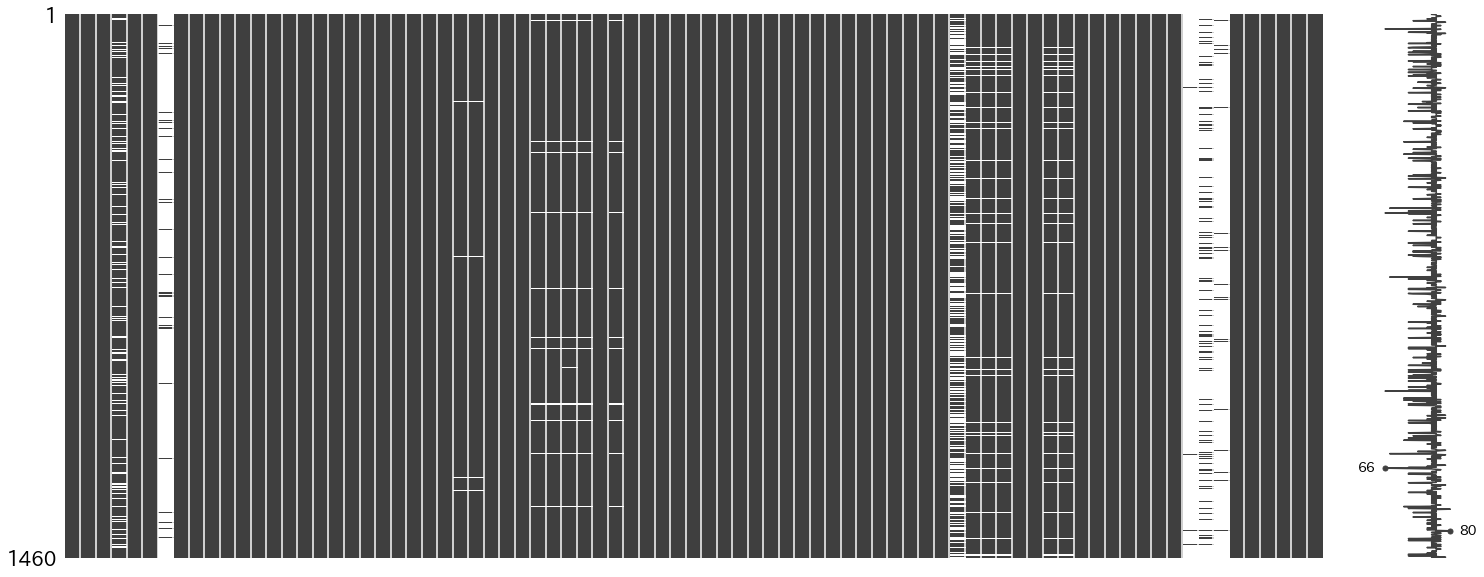

In [8]:
msno.matrix(df)

In [9]:
df_null = df.isnull()

Total = df_null.sum()
missing_ratio = df_null.sum()/1460

combined_total_missing_ratio = pd.concat([Total, missing_ratio], axis=1)

combined_total_missing_ratio.rename(columns={0:'Total', 1:'missing_ratio'}, inplace=True)

combined_total_missing_ratio

,Total,missing_ratio
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,0.937671
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [10]:
df_count_null = df.copy()
df_count_null.dropna(thresh=1455, axis=1, inplace=True)

df_count_null

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [11]:
df2_count_null = df.copy()
df2_count_null.dropna(axis=0,inplace=True)
df2_count_null

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Confirm what percentage of missing values are included.

### 5, Search the meaning of words

### 尖度（Kurtosis ）
In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population. Depending on the particular measure of kurtosis that is used, there are various interpretations of kurtosis, and of how particular measures should be interpreted.

### 歪度（skewness）
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

### 6, Check plots of dataset

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


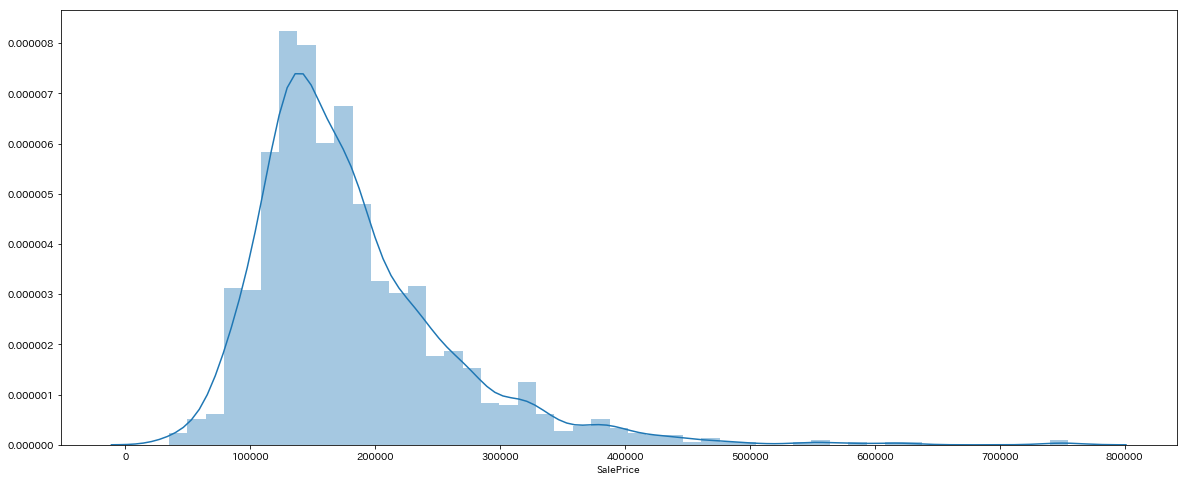

In [12]:
plt.figure(figsize=(20, 8))
# plot
sns.distplot(df['SalePrice'])

# Calculate Skewness and Kurtosis
print("Skewness :", df['SalePrice'].skew())
print("Kurtosis :", df['SalePrice'].kurt())

In [13]:
# Perform logarithmic transformation on the target variable
df['SalePrice'].apply(np.log)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [14]:
df_log = df['SalePrice'].apply(np.log)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


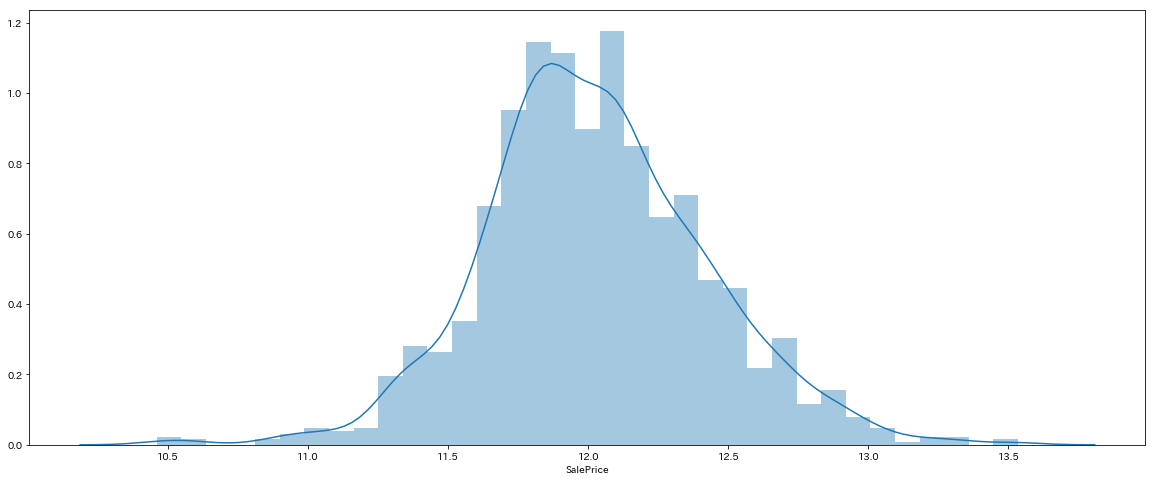

In [15]:
plt.figure(figsize=(20, 8))
# plot
sns.distplot(df_log)

# Calculate Skewness and Kurtosis
print("Skewness :", df_log.skew())
print("Kurtosis :", df_log.kurt())

### 対数変換の前後で、分布は正規分布に近づいている。

###  7, Check the correlation coefficient of dataset

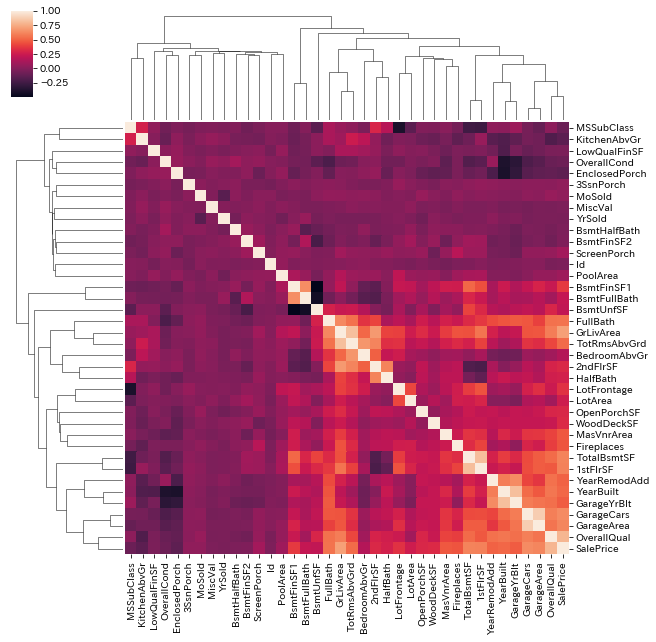

In [16]:
sns.clustermap(df.corr())

In [17]:
df_crr = df.copy()
df_crr = df_crr.corr()

# Genarate sorted dataframe
df_crr_sort = df_crr.sort_values('SalePrice', ascending=False)

In [18]:
# check sorted dataframe
df_crr_sort

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [19]:
# Genarate slice index TOP10
df_crr_sort_cut = df_crr_sort[1:11]

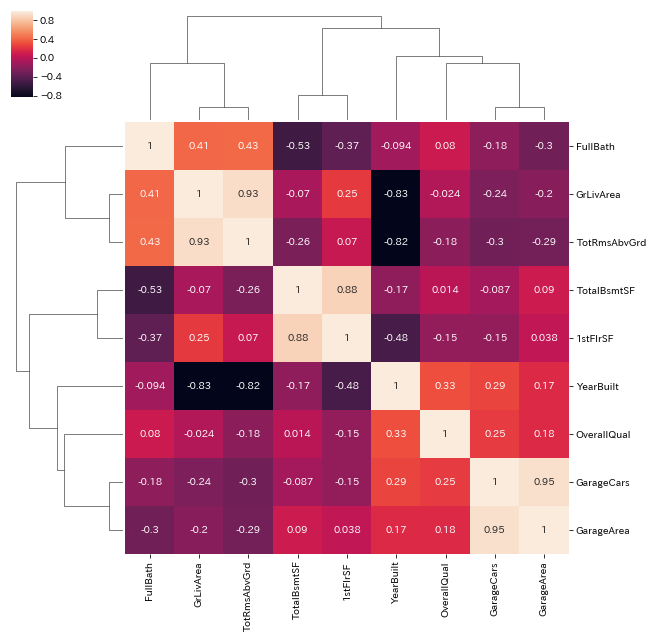

In [20]:
"""
Genarate TOP10 dataframe

/df_crr_sort.index is index names in TOP10
/df_crr_sort.index.value[] is each index name
/df_crr_sort_cut[] is 83*1 matorix

"""


df_crr_10 = df_crr_sort_cut[df_crr_sort.index.values[1]]


for num in range(2, 10):
    name = df_crr_sort.index.values[num]
    df_crr_10 = pd.concat([df_crr_10, df_crr_sort_cut[name]], axis=1)

sns.clustermap(df_crr_10.corr(),annot=True)

### 選んだ10個の特徴量
住宅売却価格が上がれば値が大きくなり、住宅価売却価格が下がれば値が小さくなるという,強い相関関係にある特徴量である。

In [21]:
df_crr_10.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
OverallQual,1.000000,-0.024136,0.250876,0.178476,0.014148,-0.152235,0.080149,-0.180819,0.326175
GrLivArea,-0.024136,1.000000,-0.243615,-0.200389,-0.070075,0.245254,0.414879,0.933231,-0.828125
GarageCars,0.250876,-0.243615,1.000000,0.948658,-0.086902,-0.151426,-0.176745,-0.299984,0.292444
GarageArea,0.178476,-0.200389,0.948658,1.000000,0.090001,0.038160,-0.304927,-0.288851,0.174474
TotalBsmtSF,0.014148,-0.070075,-0.086902,0.090001,1.000000,0.884946,-0.526150,-0.255605,-0.170933
1stFlrSF,-0.152235,0.245254,-0.151426,0.038160,0.884946,1.000000,-0.371868,0.069961,-0.483070
FullBath,0.080149,0.414879,-0.176745,-0.304927,-0.526150,-0.371868,1.000000,0.428268,-0.094193
TotRmsAbvGrd,-0.180819,0.933231,-0.299984,-0.288851,-0.255605,0.069961,0.428268,1.000000,-0.822651
YearBuilt,0.326175,-0.828125,0.292444,0.174474,-0.170933,-0.483070,-0.094193,-0.822651,1.000000


### 相関係数が高い組み合わせ三つ
[GarageArea, GarageCars], [TotRmsAbvGrd, GrLivArea], [1stFlrSF, TotalBsmtSF]

###  8, Calcurate the degree of importance

## Analyze the top10 of Independent variable

### dependent variable: SalesPrice

#### OverallQual: Overall material and finish quality
#### GrLivArea: Above grade (ground) living area square feet
#### GarageCars: Size of garage in car capacity
#### GarageArea: Size of garage in square feet
#### TotalBsmtSF: Total square feet of basement area
#### 1stFlrSF: First Floor square feet
#### BsmtFullBath: Basement full bathrooms
#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#### YearBuilt: Original construction date¶

In [22]:
# generate for random forest
for_df = df.copy()

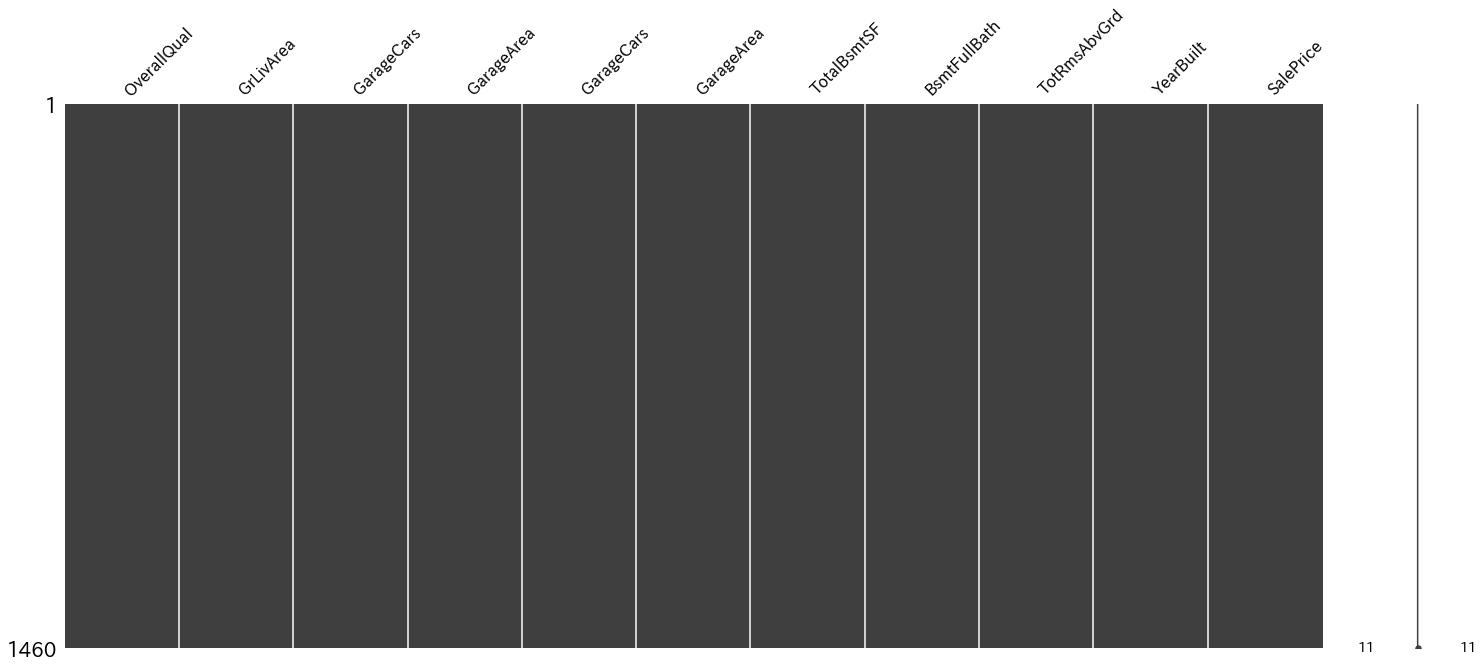

In [59]:
# generate Top10 list
top10_list = ["OverallQual", "GrLivArea", "GarageCars","GarageArea", "GarageCars", "GarageArea","TotalBsmtSF", "BsmtFullBath", "TotRmsAbvGrd","YearBuilt","SalePrice"]
top10_df = for_df.loc[:, top10_list] # remember
msno.matrix(top10_df)

In [24]:
print(sorted(df.columns, reverse=True)) # remember

['YrSold', 'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 'Utilities', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Street', 'ScreenPorch', 'SaleType', 'SalePrice', 'SaleCondition', 'RoofStyle', 'RoofMatl', 'PoolQC', 'PoolArea', 'PavedDrive', 'OverallQual', 'OverallCond', 'OpenPorchSF', 'Neighborhood', 'MoSold', 'MiscVal', 'MiscFeature', 'MasVnrType', 'MasVnrArea', 'MSZoning', 'MSSubClass', 'LowQualFinSF', 'LotShape', 'LotFrontage', 'LotConfig', 'LotArea', 'LandSlope', 'LandContour', 'KitchenQual', 'KitchenAbvGr', 'Id', 'HouseStyle', 'HeatingQC', 'Heating', 'HalfBath', 'GrLivArea', 'GarageYrBlt', 'GarageType', 'GarageQual', 'GarageFinish', 'GarageCond', 'GarageCars', 'GarageArea', 'Functional', 'FullBath', 'Foundation', 'Fireplaces', 'FireplaceQu', 'Fence', 'Exterior2nd', 'Exterior1st', 'ExterQual', 'ExterCond', 'EnclosedPorch', 'Electrical', 'Condition2', 'Condition1', 'CentralAir', 'BsmtUnfSF', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinType2', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinSF1', 'Bs

In [25]:
delete_list = ["Alley", "Fireplaces", "PoolQC", "Fence", "MiscFeature", "LotFrontage", "GarageYrBlt", "MasVnrArea"]
df_tree = df.drop(columns = delete_list) # remember
df_tree.dropna(axis=0)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000
11,12,60,RL,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,345000
13,14,20,RL,10652,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,New,Partial,279500


In [26]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [27]:
df_tree['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [28]:
df_tree_object = df_tree.select_dtypes(include=object).columns
df_tree_float = df_tree.select_dtypes(include=float).columns
df_tree_int = df_tree.select_dtypes(include=int).columns

for col in df_tree_object:
    print(df_tree[col].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [29]:
# for column in df_tree_object:
#     df_tree[column] = pd.Categorical(df_tree[column])

for column in df_tree_object:
    df_tree[column], _ = pd.factorize(df_tree[column])
    df_tree[column] = df_tree[column].astype('int')
#     dummy_vars = pd.get_dummies(df_tree[column], drop_first=False)

In [30]:
df_tree.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,9550,0,1,0,0,2,0,...,272,0,0,0,0,2,2006,0,1,140000
4,5,60,0,14260,0,1,0,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000


In [31]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston

In [32]:
# 説明変数、目的変数
X = df_tree.iloc[:, :-1].values
y = df_tree.loc[:, 'SalePrice'].values

In [33]:
# 学習用、検証用データに分割
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 666)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
#カラム内の文字数。デフォルトは50だった
pd.set_option("display.max_colwidth", 100)

#行数
pd.set_option("display.max_rows", 1500)

# sorted(
    
df_tree.isnull().sum()

# , reverse=True)

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [35]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# SalePriceの計算
from sklearn.metrics import mean_squared_error
print('SalePrice train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('SalePrice train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 出力
print('SalePrice train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
print('SalePrice train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

SalePrice train : 158794879.110, test : 1221272729.656
SalePrice train : 0.976, test : 0.782
SalePrice train : 158794879.110, test : 1221272729.656
SalePrice train : 0.976, test : 0.782


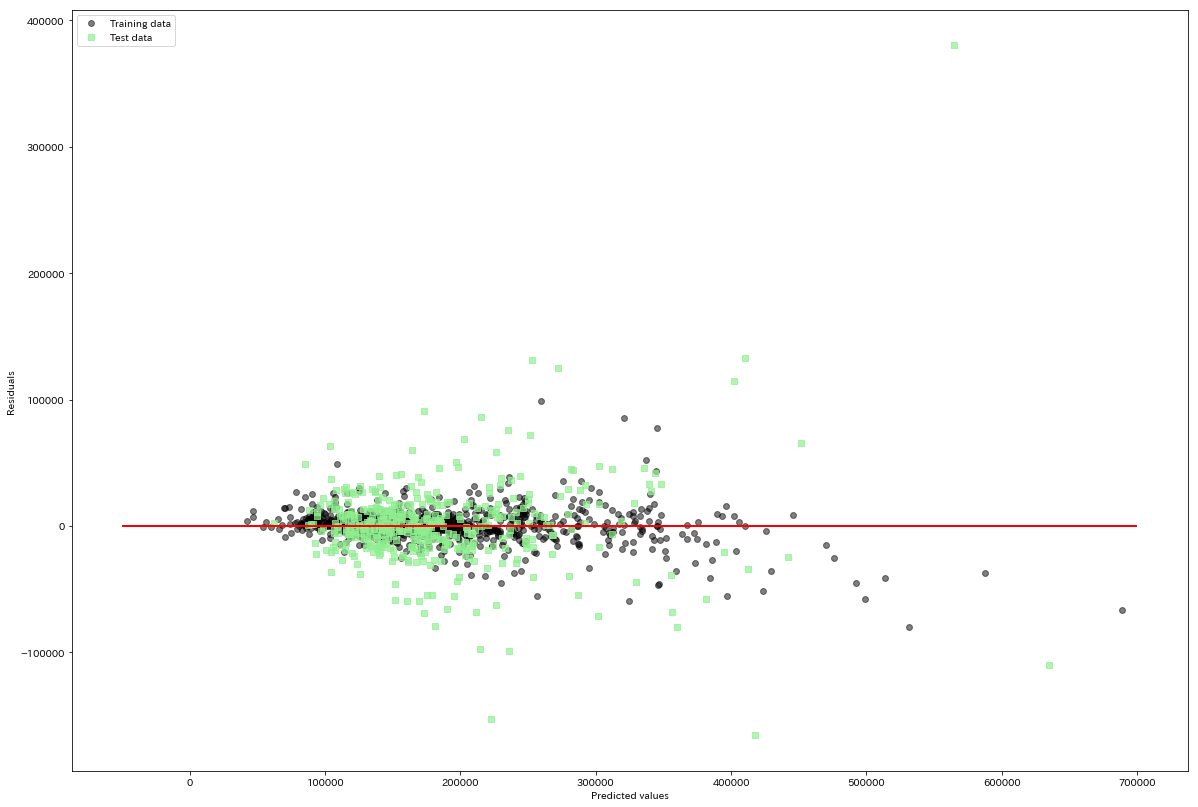

In [68]:
# matplotlibを呼び出す
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20, 14))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -50000, xmax = 700000, lw = 2, color = 'red')
plt.show()

In [62]:
top10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
OverallQual     1460 non-null int64
GrLivArea       1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
TotalBsmtSF     1460 non-null int64
BsmtFullBath    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
YearBuilt       1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(11)
memory usage: 125.5 KB


In [60]:
top10_df.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
BsmtFullBath    0
TotRmsAbvGrd    0
YearBuilt       0
SalePrice       0
dtype: int64

64dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0061  recall:0.0079  f1:0.0063
48dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0050  recall:0.0056  f1:0.0050
32dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0047  recall:0.0047  f1:0.0038
24dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0024  recall:0.0050  f1:0.0030
16dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0036  recall:0.0051  f1:0.0039
8dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0060  recall:0.0040  f1:0.0043
4dim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision:0.0000  recall:0.0000  f1:0.0000


NameError: name 'importance' is not defined

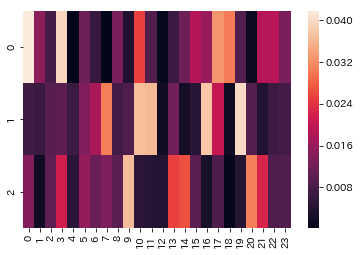

In [69]:
# coding: UTF-8

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.cross_validation import train_test_split


def visualize_digits_importances(importances):
    im_array = np.reshape(importances, (3, 24))
    
    plt.figure()
    sns.heatmap(im_array)
    plt.savefig("importances.png")

def main():
    # 訓練データ、テストデータの生成
    top10_df.iloc[:, :-1].values
    top10_df.loc[:, 'SalePrice'].values
    
    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 666)
   
    # 特徴重要度計算のためのRFの訓練
    rfc1 = RFC(n_estimators=500, n_jobs=-1)
    rfc1.fit(X_train, y_train)

    # この場合の性能を確認
    preds = rfc1.predict(X_test)
    print("64dim")
    print("precision:{0:.4f}  recall:{1:.4f}  f1:{2:.4f}".format(
        *prfs(y_test, preds, average="macro")))

    # わかりやすいように重要度を描画してみた
    visualize_digits_importances(rfc1.feature_importances_)

    # 重要さ順に並んだindexを作成
    important_index = [i for importance, i in sorted(
        zip(rfc1.feature_importances_, range(rfc1.n_features_)),
        key=lambda x:x[0], reverse=True)]

    # 次元数=48, 32, 24, 16, 8, 4の6パターンで試す
    for n_features in [48, 32, 24, 16, 8, 4]:
        index = important_index[:n_features]
    
        # 重要な特徴だけ選択した特徴量を新しく作る
        selected_X_train, selected_X_test = [x[:,index] for x in [X_train, X_test]]
 
        # 重要な特徴だけで学習
        rfc2 = RFC(n_estimators=500, n_jobs=-1)
        rfc2.fit(selected_X_train, y_train)
    
        # 重要な特徴だけ使った場合の性能を確認
        preds = rfc2.predict(selected_X_test)
        print("{0}dim".format(n_features))
        print("precision:{0:.4f}  recall:{1:.4f}  f1:{2:.4f}".format(
            *prfs(y_test, preds, average="macro")))
        
    return importance

if __name__ == "__main__":
    main()

###  9, More deep analysis